In [91]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.connectome import vec_to_sym_matrix, sym_matrix_to_vec

import sys
sys.path.append('../')
from PAINTeR import plot # in-house lib used for the RPN-signature

In [92]:
# load data
df_bochum = pd.read_csv("../res/bochum_sample_excl.csv")
df_essen = pd.read_csv("../res/essen_sample_excl.csv")
df_szeged = pd.read_csv("../res/szeged_sample_excl.csv")
df_bochum['study']='bochum'
df_essen['study']='essen'
df_szeged['study']='szeged'
df=pd.concat((df_bochum, df_essen, df_szeged), sort=False)
df=df.reset_index()
y = df.mean_QST_pain_sensitivity

## Load nested cv predictions

In [93]:
# predictions
predictions = {
    "L1SO" : np.genfromtxt('../scripts/multi-center/L1SO_nested_cv_pred.csv', delimiter=','),
    "L2SO" : np.genfromtxt('nested_cv_pred_L2SO.csv', delimiter=','),
    "GroupKFold" : np.genfromtxt('nested_cv_pred_full_GroupKFold30.csv', delimiter=','),
}


study_masks = {
    "study 1" : (df.study == 'bochum').values,
    "study 2" : (df.study == 'essen').values,
    "study 3" : (df.study == 'szeged').values,
    "study 1+2" : (df.study != 'szeged').values,
    "study 1+3" : (df.study != 'essen').values,
    "study 2+3" : (df.study != 'bochum').values,
    "study 1+2+3" : np.array([True] * len(y))
}


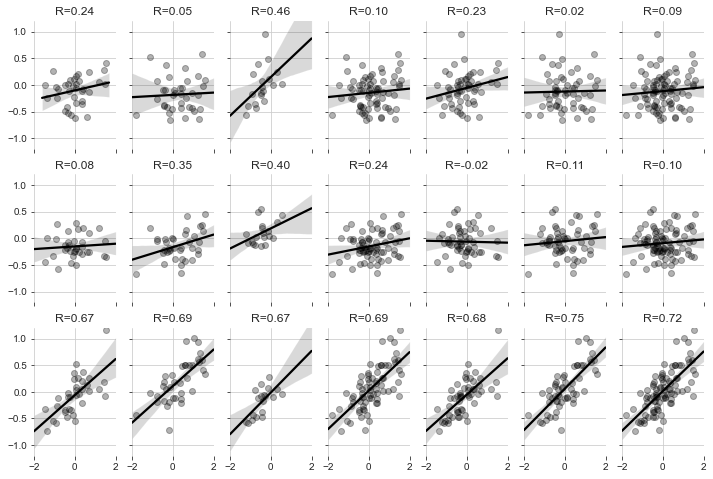

In [90]:
# world's slowest plotting function
sns.set_style('ticks')
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(12,8), sharex=True, sharey=True)

for row, cv in enumerate(predictions.keys()):
    for col, study in enumerate(study_masks.keys()):
        g=sns.regplot(y[study_masks[study]], predictions[cv][study_masks[study]], ax=axs[row, col],
                    scatter=True, scatter_kws={'alpha':0.3}, color='black')
        g.set(xlabel=None) 
        axs[row, col].set_xlim([-2, 2])
        axs[row, col].set_ylim([-1.2, 1.2])
        axs[row, col].spines['top'].set_visible(False)
        axs[row, col].spines['bottom'].set_visible(False)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['left'].set_visible(False)
        axs[row, col].grid(True)
        corr = np.corrcoef(y[study_masks[study]], predictions[cv][study_masks[study]])[0,1]
        
        axs[row, col].title.set_text("R={:.2f}".format(corr))

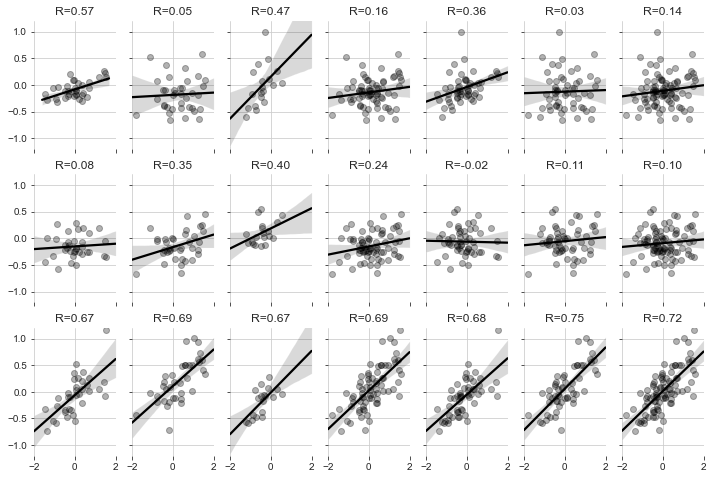

In [94]:
# world's slowest plotting function
sns.set_style('ticks')
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(12,8), sharex=True, sharey=True)

for row, cv in enumerate(predictions.keys()):
    for col, study in enumerate(study_masks.keys()):
        g=sns.regplot(y[study_masks[study]], predictions[cv][study_masks[study]], ax=axs[row, col],
                    scatter=True, scatter_kws={'alpha':0.3}, color='black')
        g.set(xlabel=None) 
        axs[row, col].set_xlim([-2, 2])
        axs[row, col].set_ylim([-1.2, 1.2])
        axs[row, col].spines['top'].set_visible(False)
        axs[row, col].spines['bottom'].set_visible(False)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['left'].set_visible(False)
        axs[row, col].grid(True)
        corr = np.corrcoef(y[study_masks[study]], predictions[cv][study_masks[study]])[0,1]
        
        axs[row, col].title.set_text("R={:.2f}".format(corr))